# ALERT Doctoral School 2023

## Hands-on regression methods - Exercise 2


Author: Filippo Masi

### Objectives
- Learn how to perform regression to obtain an interpretable (hyper-elastic) constitutive model that best fits stress-strain ($\tau-\gamma$) data;

#### Disclaimer

This hands-on notebook is devoted to **Regression methods** and it covers chapter 2.<br>
In the following, the code cells introduced by a tag **[TODO]** are meant to be completed by you!

### 1. Introduction

We start by importing the libraries and functions needed for the exercise.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(6)

colorb=(0.2,0.4,0.7)
colorr=(0.9,0.1,0.1)

In [2]:
def scaling(x,fit=False,transform=False,inverse_transform=False,norm=True,param=None):

    ''' scale variable x
        :param x: variable
        :type x:  umpy array
        :param fit: find scaling parameters
        :type fit:  bool
        :param transform: scale x
        :type transform:  bool
        :param inverse_transform: inverse scale x
        :type inverse_transform:  bool
        :param norm: inverse scale x
        :type norm:  bool
        :param fit: scaling parameters
        :type fit:  list
    
        :return: scaling parameters (if fit=False)
                 :rtype: list 
                 scaled x (if transform=True)
                 :rtype: numpy array 
                 inverse scaled x (if inverse_transform=True)
                 :rtype: numpy array
    '''
    
    if fit==True:
        if norm==True:
            min_ = np.amin(x); max_ = np.amax(x)
            a = 0.5*(max_-min_)
            b = 0.5*(max_+min_)
        else:
            a = np.std(x,axis=0)
            b = np.mean(x,axis=0)
        return [a,b]
    elif transform==True:
        return np.divide(x-param[1],param[0])
    elif inverse_transform==True:
        return np.multiply(x,param[0])+param[1]

***Problem:*** Find the constitutive model that best fits the data (imported below) using regression methods.

The material is three-dimensional and the data consist of the volumetric and deviatoric invariants of the total strain and stress:

$\varepsilon = \begin{bmatrix}\varepsilon_v & \varepsilon_s \end{bmatrix}, \quad
\sigma = \begin{bmatrix}p & q \end{bmatrix},$

where $\varepsilon_v=\varepsilon_{ii}$, $p=\frac{1}{3}\sigma_{ii}$, $\varepsilon_s=\sqrt{\smash[b]{\frac{3}{2} \varepsilon'_{ij}\varepsilon'_{ij}}}$ and $q=\sqrt{\smash[b]{\frac{2}{3} \sigma'_{ij}\sigma'_{ij}}}$, with $x'_{ij}$ being the deviatoric part of the second-order tensor $x_{ij}$, i.e. $x_{ij}'\equiv x_{ij}-\frac{x_{ii}}{3}$, and $i,j=1,2,3$.


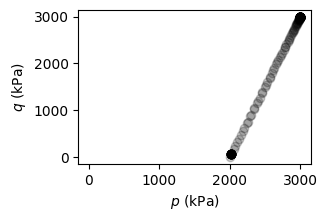

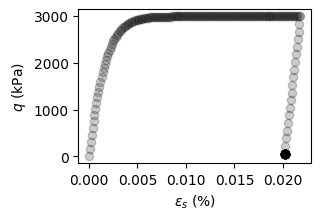

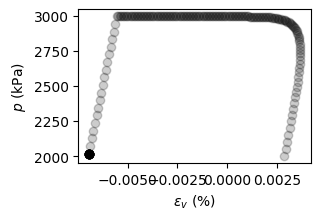

In [3]:
import pickle
file = './data/MAT3'
with open(file, 'rb') as f_obj:
    eps,sigma = pickle.load(f_obj)

# plot
fig = plt.figure(figsize=(3., 2.))
plt.plot(sigma[:,0],sigma[:,1],'ko',alpha=0.2)
plt.ylabel('$q$ (kPa)')
plt.xlabel('$p$ (kPa)')
plt.plot(0,0)
plt.show()

fig = plt.figure(figsize=(3., 2.))
plt.plot(eps[:,1]*100,sigma[:,1],'ko',alpha=0.2)
plt.ylabel('$q$ (kPa)')
plt.xlabel('$\\varepsilon_s$ (%)')
plt.show()

fig = plt.figure(figsize=(3., 2.))
plt.plot(eps[:,0]*100,sigma[:,0],'ko',alpha=0.2)
plt.ylabel('$p$ (kPa)')
plt.xlabel('$\\varepsilon_v$ (%)')
plt.show()

**[TODO-1]**
- Find the regression model that best fits the above data

*Hint 1:* The data concern a hypo-plastic material.

*Hint 2:* As we only know the total strain and stress, the problem can be solved via the identification of an incremental constitutive model (different from the two previous exercises).

In [4]:
# ???

**[TODO-2]**
- Using the best fits model identified, predict the material response for the loading path provided below (by the new data set `MAT3rec`). _Can you predict the behavior at reloading?_


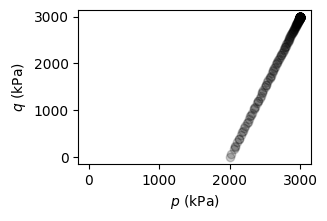

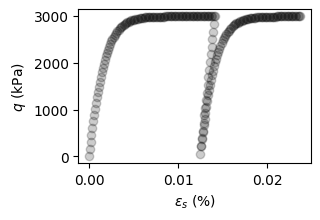

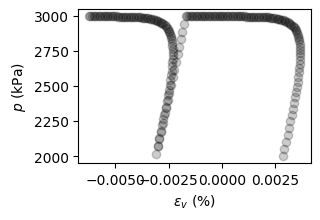

In [5]:
import pickle
file = './data/MAT3rec'
with open(file, 'rb') as f_obj:
    eps,sigma = pickle.load(f_obj)

# plot
fig = plt.figure(figsize=(3., 2.))
plt.plot(sigma[:,0],sigma[:,1],'ko',alpha=0.2)
plt.ylabel('$q$ (kPa)')
plt.xlabel('$p$ (kPa)')
plt.plot(0,0)
plt.show()

fig = plt.figure(figsize=(3., 2.))
plt.plot(eps[:,1]*100,sigma[:,1],'ko',alpha=0.2)
plt.ylabel('$q$ (kPa)')
plt.xlabel('$\\varepsilon_s$ (%)')
plt.show()

fig = plt.figure(figsize=(3., 2.))
plt.plot(eps[:,0]*100,sigma[:,0],'ko',alpha=0.2)
plt.ylabel('$p$ (kPa)')
plt.xlabel('$\\varepsilon_v$ (%)')
plt.show()